In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datasets import HousingDatasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

color_list = list(mcolors.TABLEAU_COLORS.keys())
plt.rcParams["figure.figsize"] = (12, 4)

def plot_recessions(df):
    # Adding shaded regions for where the recession is
    for _, row in recessions.iterrows():
        if row['End'] > df['date'].min():
            plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

datasets = HousingDatasets()
recessions = datasets.load_recessions()
display(recessions.tail())

,Name,Start,End,Peak unemployment,GDP decline (peak to trough),Characteristics
10,1981–1982 recession,1981-07-01,1982-11-01,0.108,−2.7%,The Iranian Revolution sharply increased the p...
11,Early 1990s recession,1990-07-01,1991-03-01,0.078,−1.4%,After the lengthy peacetime expansion of the 1...
12,Early 2000s recession,2001-03-01,2001-11-01,0.063,−0.3%,The 1990s were the longest period of economic ...
13,Great Recession,2007-12-01,2009-06-01,0.100,−5.1%,The subprime mortgage crisis led to the collap...
14,COVID-19 recession,2020-02-01,2020-04-01,0.147,−19.2%,The economic effects of the pandemic were seve...


In [50]:
from darts import TimeSeries, concatenate
from darts.utils.utils import ModelMode
from darts.utils.callbacks import TFMProgressBar
from darts.utils.statistics import plot_acf, plot_pacf, check_seasonality, stationarity_test_adf, stationarity_tests, extract_trend_and_seasonality
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler, Diff
from darts.dataprocessing import dtw
from darts.models import *

c:\Users\eric_\miniconda3\envs\py3115\Lib\site-packages\darts\timeseries.py:732: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(


<Axes: xlabel='date'>

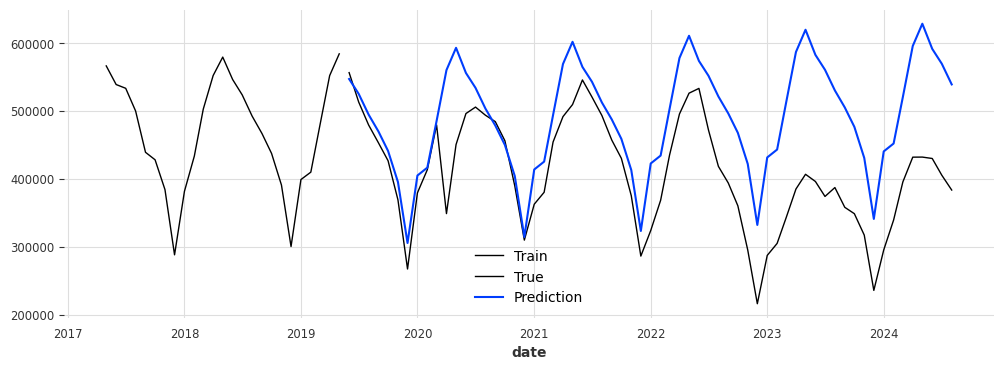

In [124]:
new_listings = datasets.load_new_listings()
# plt.plot(new_listings.date, new_listings.value)

series = TimeSeries.from_dataframe(new_listings, time_col='date')
_, series = series.split_before(pd.Timestamp('2017-05-01'))
train, test = series.split_after(pd.Timestamp('2019-05-01'))

seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(test))

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(len(test))

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

train.plot(label='Train', linewidth=1, color='black')
test.plot(label='True', linewidth=1, alpha=1)
combined_forecast.plot(label="Prediction", linewidth=1.5)

c:\Users\eric_\miniconda3\envs\py3115\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


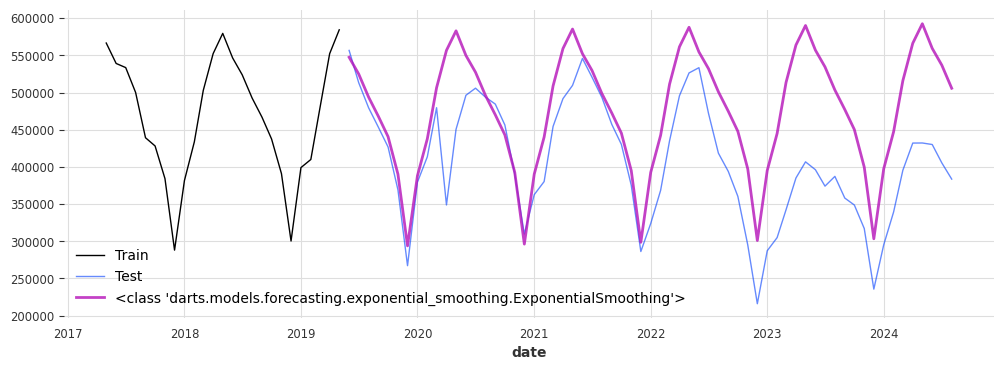

In [46]:
model = ExponentialSmoothing(seasonal_periods=12)
model.fit(train)
pred = model.predict(len(test))
train.plot(label='Train', linewidth=1)
test.plot(label='Test', linewidth=1, alpha=0.6)
pred.plot(label=f'{ExponentialSmoothing}', alpha=0.8)
plt.show()


c:\Users\eric_\miniconda3\envs\py3115\Lib\site-packages\darts\timeseries.py:732: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(


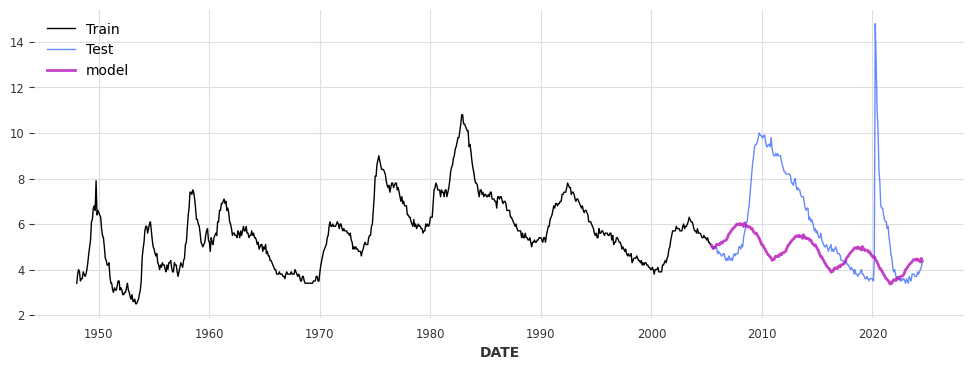

In [42]:
unemployment_rate = pd.read_csv('data/UNRATE.csv')
unemployment_rate.rename(columns={"UNRATE":'rate'}, inplace=True)
unemployment_rate['DATE'] = unemployment_rate['DATE'].astype('datetime64[us]')

series = TimeSeries.from_dataframe(unemployment_rate, time_col='DATE')
train, test = series.split_after(0.75)

model = ExponentialSmoothing(seasonal_periods=64)
model.fit(train)
pred = model.predict(len(test))
train.plot(label='Train', linewidth=1)
test.plot(label='Test', linewidth=1, alpha=0.6)
pred.plot(label=f'model', alpha=0.8)
plt.show()

In [43]:
# Thoughts: probabilistic approach, historically when we have seen this rate of change, what occured next?

In [79]:
new_house_supply = TimeSeries.from_dataframe(datasets.load_new_house_supply(), time_col='date')
new_house_started = TimeSeries.from_dataframe(datasets.load_new_house_started(), time_col='date')

normalized_new_house_started = new_house_started / new_house_started.mean(axis=0).first_value()
normalized_new_house_supply = new_house_supply / new_house_supply.mean(axis=0).first_value()
# CostMatrix

# dwt = DTWAlignment(new_house_supply, new_house_started)

c:\Users\eric_\miniconda3\envs\py3115\Lib\site-packages\darts\timeseries.py:732: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(
c:\Users\eric_\miniconda3\envs\py3115\Lib\site-packages\darts\timeseries.py:732: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable const

<Axes: xlabel='date'>

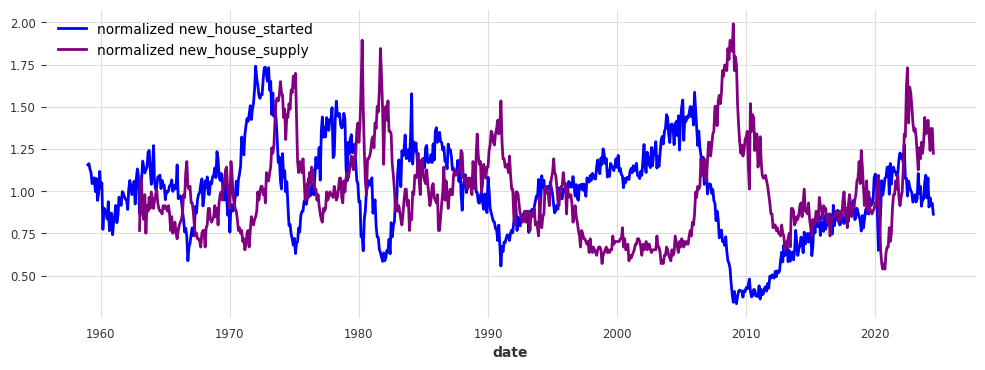

In [115]:
(normalized_new_house_started).plot(label='normalized new_house_started', color='blue')
(normalized_new_house_supply).plot(label='normalized new_house_supply', color='purple') 

New house starts and supply have been closely linked after the fallout of the 2008 recession, implying a healthier housing market.

Text(0.5, 1.0, 'Warp Alignment')

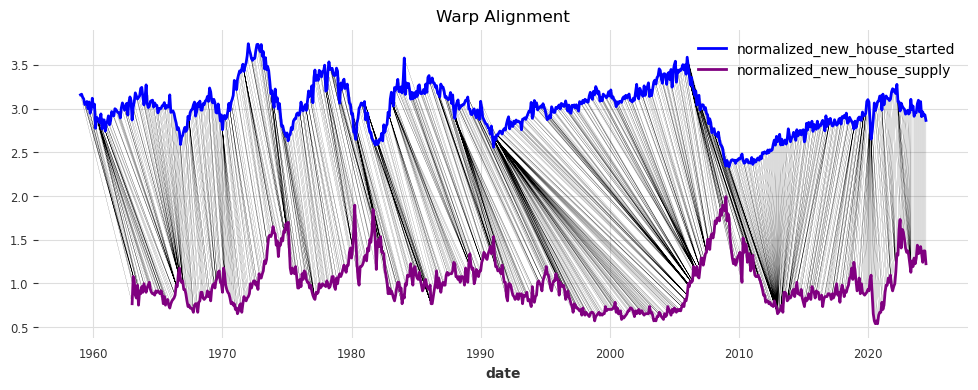

In [117]:
exact_alignment = dtw.dtw(normalized_new_house_started, normalized_new_house_supply)
# exact_alignment.plot(show_series=True)

exact_alignment.plot_alignment(series1_y_offset=2, 
                               args_series1={'label':'normalized_new_house_started', 'color':'blue'}, 
                               args_series2={'label':'normalized_new_house_supply', 'color':'purple'}, 
                               args_line={'linewidth': .1})
plt.gca().set_title("Warp Alignment")

<Axes: xlabel='date'>

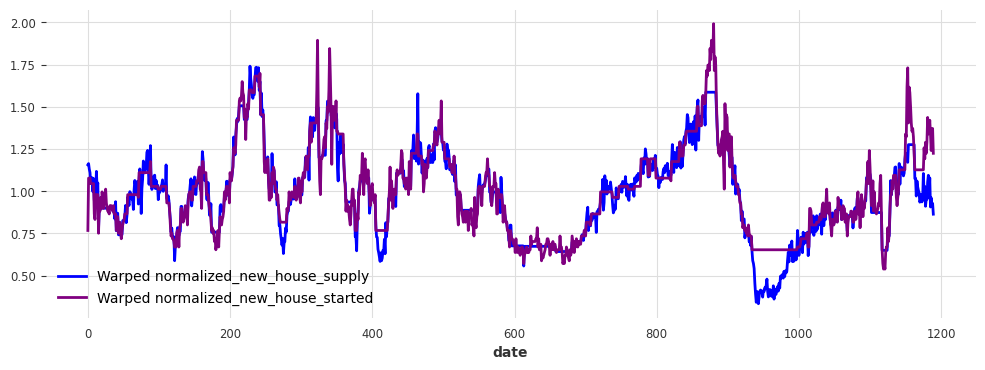

In [119]:
warped_ts, warped_ts_shape = exact_alignment.warped()

warped_ts.plot(label="Warped normalized_new_house_supply", color='blue')
warped_ts_shape.plot(label="Warped normalized_new_house_started", color='purple')

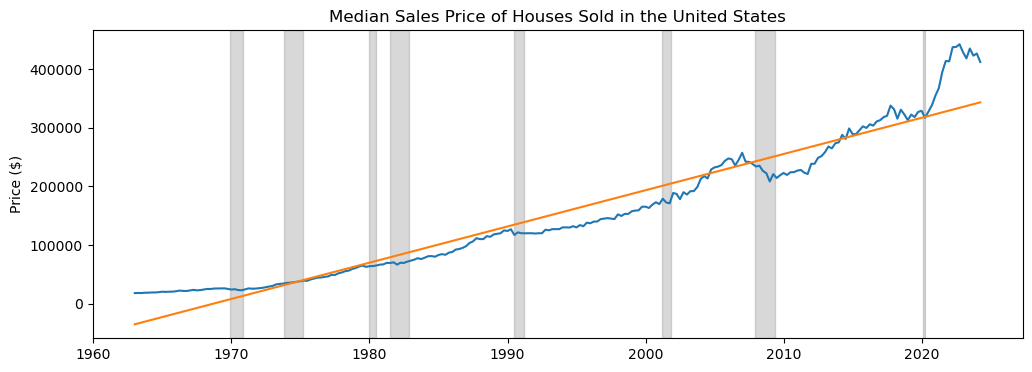

In [3]:
median_house_price = datasets.load_median_house_price()

reg = linear_model.LinearRegression()
X = median_house_price.index.to_numpy().reshape(-1, 1)
reg.fit(X, median_house_price.value.to_numpy().reshape(-1, 1))
pred = reg.predict(X)

plt.plot(median_house_price.date, median_house_price.value)
plt.plot(median_house_price.date, pred)
plt.title('Median Sales Price of Houses Sold in the United States')
plt.ylabel('Price ($)')
plot_recessions(median_house_price)

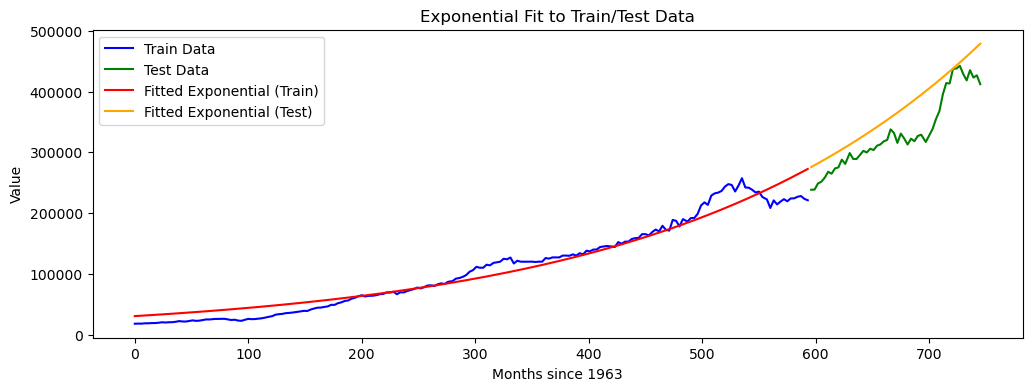

Fitted parameters: a = 30328.55427401279, b = 0.003703944804017124


In [27]:
median_house_price['months'] = (median_house_price['date'] - median_house_price['date'].min()).dt.days // 30

X_train, X_test, y_train, y_test = train_test_split(median_house_price['months'], median_house_price['value'], test_size=0.2, random_state=42, shuffle=False)

# Define the exponential function y = a * exp(b * x)
def exponential_func(x, a, b):
    return a * np.exp(b * np.array(x))

# Fit the exponential curve on training data
popt, pcov = curve_fit(exponential_func, X_train, y_train, p0=(1, 0.01))  # Initial guess for a, b
print(f"Fitted parameters: a = {popt[0]}, b = {popt[1]}")

# Predict on training and test data
y_train_pred = exponential_func(X_train, *popt)
y_test_pred = exponential_func(X_test, *popt)

plt.plot(X_train, y_train, label='Train Data', color='blue')
plt.plot(X_test, y_test, label='Test Data', color='green')
plt.plot(sorted(X_train), exponential_func(sorted(X_train), *popt), label='Fitted Exponential (Train)', color='red')
plt.plot(sorted(X_test), exponential_func(sorted(X_test), *popt), label='Fitted Exponential (Test)', color='orange')
plt.xlabel(f'Months since {median_house_price["date"].min().year}')
plt.ylabel('Value')
plt.title('Exponential Fit to Train/Test Data')
plt.legend()
plt.show()

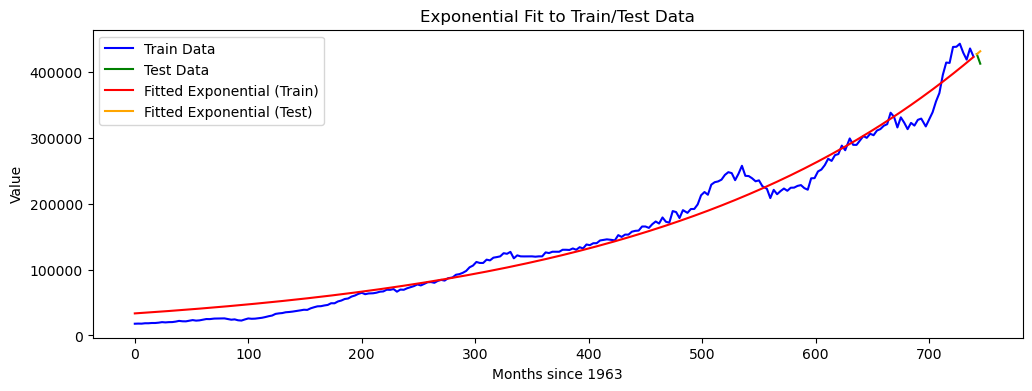

Fitted parameters: a = 33461.52103318388, b = 0.0034310691104013666


In [61]:
X_train, X_test, y_train, y_test = train_test_split(median_house_price['months'], median_house_price['value'], test_size=0.005, random_state=42, shuffle=False)
# Fit the exponential curve on training data
popt, pcov = curve_fit(exponential_func, X_train, y_train, p0=(1, 0.01))  # Initial guess for a, b
print(f"Fitted parameters: a = {popt[0]}, b = {popt[1]}")

# Predict on training and test data
y_train_pred = exponential_func(X_train, *popt)
y_test_pred = exponential_func(X_test, *popt)

plt.plot(X_train, y_train, label='Train Data', color='blue')
plt.plot(X_test, y_test, label='Test Data', color='green')
plt.plot(sorted(X_train), exponential_func(sorted(X_train), *popt), label='Fitted Exponential (Train)', color='red')
plt.plot(sorted(X_test), exponential_func(sorted(X_test), *popt), label='Fitted Exponential (Test)', color='orange')
plt.xlabel(f'Months since {median_house_price["date"].min().year}')
plt.ylabel('Value')
plt.title('Exponential Fit to Train/Test Data')
plt.legend()
plt.show()

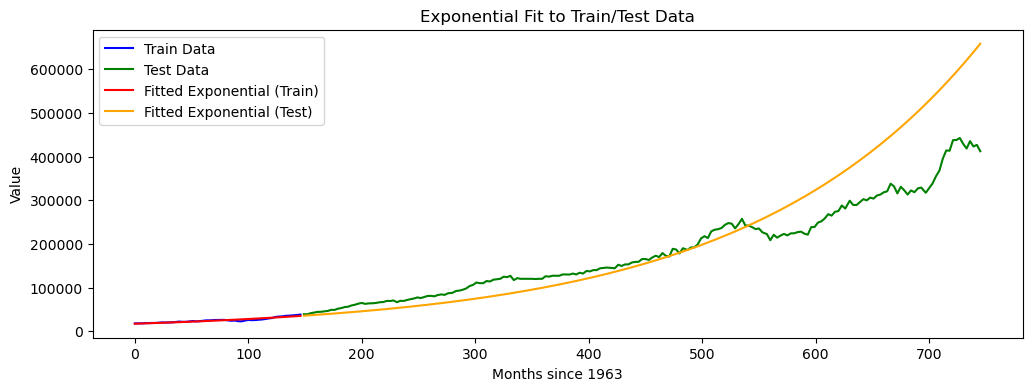

Fitted parameters: a = 17120.537940412578, b = 0.004899037067459678


In [62]:
X_train, X_test, y_train, y_test = train_test_split(median_house_price['months'], median_house_price['value'], test_size=0.8, random_state=42, shuffle=False)
# Fit the exponential curve on training data
popt, pcov = curve_fit(exponential_func, X_train, y_train, p0=(1, 0.01))  # Initial guess for a, b
print(f"Fitted parameters: a = {popt[0]}, b = {popt[1]}")

# Predict on training and test data
y_train_pred = exponential_func(X_train, *popt)
y_test_pred = exponential_func(X_test, *popt)

plt.plot(X_train, y_train, label='Train Data', color='blue')
plt.plot(X_test, y_test, label='Test Data', color='green')
plt.plot(sorted(X_train), exponential_func(sorted(X_train), *popt), label='Fitted Exponential (Train)', color='red')
plt.plot(sorted(X_test), exponential_func(sorted(X_test), *popt), label='Fitted Exponential (Test)', color='orange')
plt.xlabel(f'Months since {median_house_price["date"].min().year}')
plt.ylabel('Value')
plt.title('Exponential Fit to Train/Test Data')
plt.legend()
plt.show()


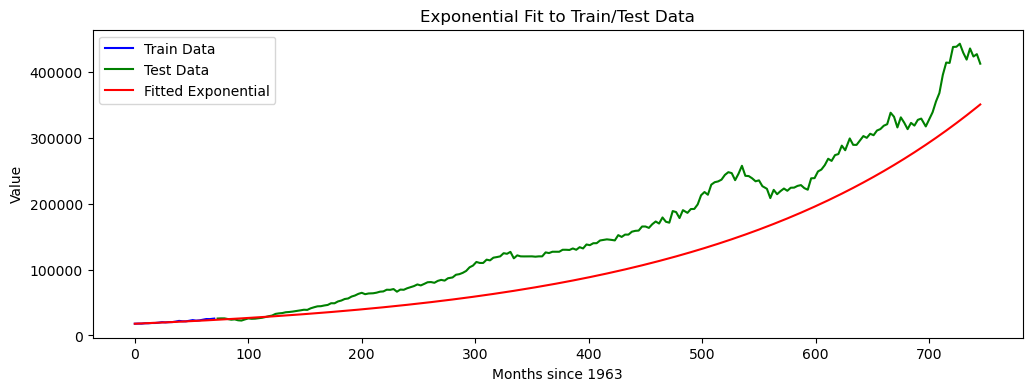

Fitted parameters: a = 17800.0, b = 0.004


In [53]:
popt = [median_house_price.iloc[0]['value'], 0.004]
print(f"Fitted parameters: a = {popt[0]}, b = {popt[1]}")

plt.plot(X_train, y_train, label='Train Data', color='blue')
plt.plot(X_test, y_test, label='Test Data', color='green')
plt.plot(sorted(median_house_price['months']), exponential_func(sorted(median_house_price['months']), *popt), label='Fitted Exponential', color='red')
plt.xlabel(f'Months since {median_house_price["date"].min().year}')
plt.ylabel('Value')
plt.title('Exponential Fit to Train/Test Data')
plt.legend()
plt.show()
print(f"Fitted parameters: a = {popt[0]}, b = {popt[1]}")

In [59]:
exponential_func(sorted(median_house_price['months']), *popt)[-1]

350443.13627677073